# Indian Premier League (IPL) Statistics

* The Indian Premier League (IPL) is a professional domestic T20 cricket tournament contested every year by teams representing different Indian cities. The tournament's inaugural season was held in 2008.
* This web app is designed to display Season-wise, Team-wise and Team Head-to-Head stats for all matches played in the IPL between 2008 and 2019.

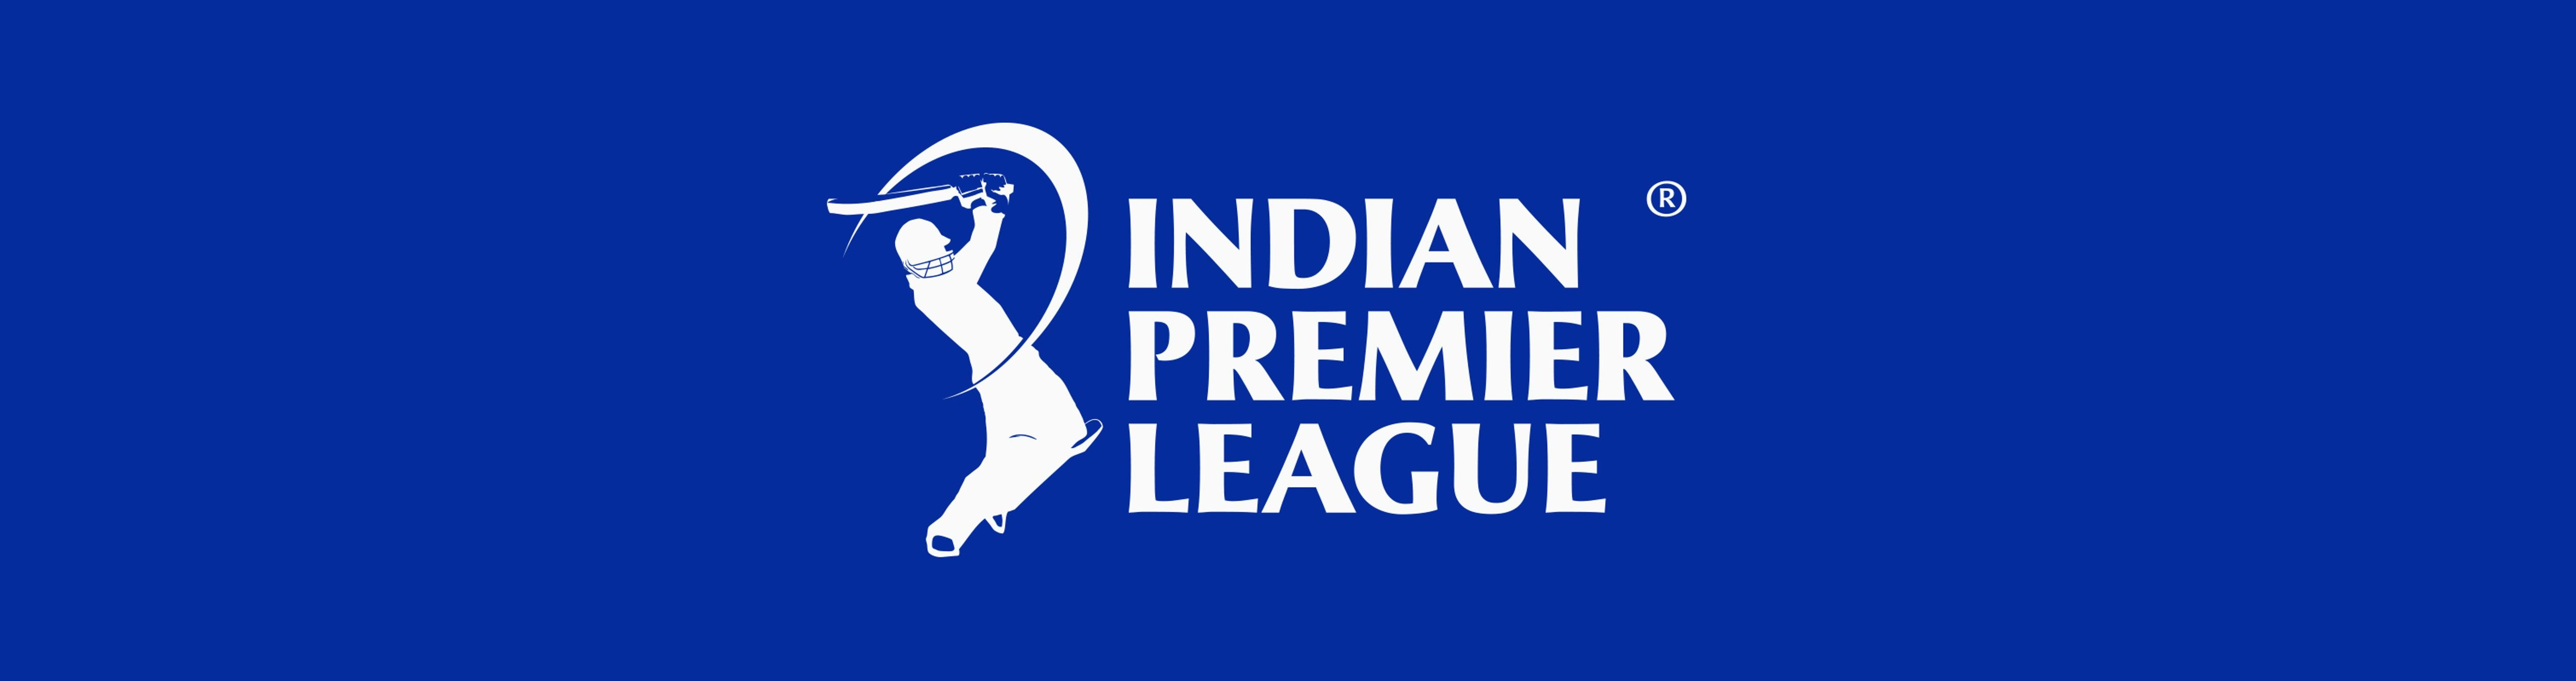

In [58]:
import numpy as np
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from statistics import mode

In [59]:
matches=pd.read_csv('matches.csv')

deliveries=pd.read_csv('deliveries.csv')

In [60]:
deliveries = pd.merge(deliveries,matches[['id','season']],left_on='match_id',right_on='id').drop(['id'], axis = 1)

deliveries=deliveries.replace(to_replace ='Rising Pune Supergiant', value ='Rising Pune Supergiants')
matches=matches.replace(to_replace ='Rising Pune Supergiant', value ='Rising Pune Supergiants')
deliveries=deliveries.replace(to_replace ='Delhi Daredevils', value ='Delhi Capitals')
matches=matches.replace(to_replace ='Delhi Daredevils', value ='Delhi Capitals')

matches['city']=matches['city'].replace(to_replace ='Bangalore', value ='Bengaluru')
matches['city']=matches['city'].replace(to_replace ='Mohali', value ='Chandigarh')
matches['city']=matches['city'].replace(to_replace ='Dharamsala', value ='Dharamshala')

matches['toss_decision']=matches['toss_decision'].replace(to_replace ='bat', value ='Bat')
matches['toss_decision']=matches['toss_decision'].replace(to_replace ='field', value ='Field')

In [61]:
# BREAK - SEASON WISE STARTS

In [62]:
def winner_season(season):
    if season=='All Seasons':
        matches_season=matches
        deliveries_season=deliveries
        
        winner=[]
        for i in matches.season.unique():
                aaa=matches[matches.season==i]
                final_season=aaa[aaa['id']==max(aaa['id'])][:]
                winner_season=final_season[final_season['id']==max(aaa['id'])]['winner'].unique()[0]
                winner.append(winner_season)
        print('\n\033[1m'+' >>> '+'Team with most IPL Title Wins : '+mode(winner)+' ('+str(winner.count(mode(winner)))+').\033[0m')

    elif season in matches.season.unique():
        matches_season=matches[matches.season==season]
        deliveries_season=deliveries[deliveries.season==season]
        
        final_season=matches_season[matches_season['id']==max(matches_season['id'])][:]
        winner_season=final_season[final_season['id']==max(matches_season['id'])]['winner'].unique()[0]
        print('\n\033[1m'+' >>> '+'IPL winner in '+str(season)+' : '+winner_season+'.\033[0m')

In [63]:
def total_matches_season(season): 
    
    if season=='All Seasons':
        matches_season=matches
        deliveries_season=deliveries

    elif int(season) in matches.season.unique():
        matches_season=matches[matches.season==season]
        deliveries_season=deliveries[deliveries.season==season]
    
    team_matches=matches_season['team1'].value_counts()+matches_season['team2'].value_counts()
    team_matches=team_matches.sort_values(ascending=False)

    fig = px.pie(names = team_matches.index, values = team_matches.values,
                 title =('• No. of matches played by each team in {}'.format(season)),hole = 0.6)
    fig.update_traces(textinfo='value')
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show() 

In [64]:
def season_toss_wins(season): 
    
    if season=='All Seasons':
        matches_season=matches
        deliveries_season=deliveries

    elif int(season) in matches.season.unique():
        matches_season=matches[matches.season==season]
        deliveries_season=deliveries[deliveries.season==season]
    
    toss_winners=matches_season['toss_winner'].value_counts()
    toss_winners=toss_winners.sort_values(ascending=False)

    fig = px.pie(names = toss_winners.index, values = toss_winners.values,
                 title =('• No. of tosses won by each team in {}'.format(season)),hole = 0.6)
    fig.update_traces(textinfo='value') 
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)   
    return fig.show()

In [65]:
def toss_decisions(season): 
    
    if season=='All Seasons':
        matches_season=matches
        deliveries_season=deliveries

    elif int(season) in matches.season.unique():
        matches_season=matches[matches.season==season]
        deliveries_season=deliveries[deliveries.season==season]
    
    toss_decision=matches_season['toss_decision'].value_counts()
    toss_decision=toss_decision.sort_values(ascending=False)
    fig = px.pie(names = toss_decision.index, values = toss_decision.values,
                 title =("• Toss winners' decisions in {}".format(season)),hole=0.6)
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    
    return fig.show()

In [66]:
def total_wins_season(season): 
    
    if season=='All Seasons':
        matches_season=matches
        deliveries_season=deliveries

    elif int(season) in matches.season.unique():
        matches_season=matches[matches.season==season]
        deliveries_season=deliveries[deliveries.season==season]
        
    team_wins=matches_season['winner'].value_counts()
    team_wins=team_wins.sort_values(ascending=False)

    fig=px.bar(y=(team_wins.index),x=(team_wins.values),color = team_wins.index,
               labels={'x': 'Wins','y': 'Team','color':'Team'},
               title=('• No. of matches won by each team in {}'.format(season)))
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show()

In [67]:
def runs_margin_season(season): 
    
    if season=='All Seasons':
        matches_season=matches
        deliveries_season=deliveries

    elif int(season) in matches.season.unique():
        matches_season=matches[matches.season==season]
        deliveries_season=deliveries[deliveries.season==season]
        
    runs_margin_season=[]
    for i in matches_season.winner.value_counts().index:
            runs_margin_season.append(matches_season[matches_season['winner']==i][['win_by_runs']].win_by_runs.max())
     
    fig=px.line(x=matches_season.winner.value_counts().index, y=runs_margin_season,
            labels={'x': 'Team','y': 'Highest Winning Margin(Runs)','color':'Team'},
            title=('• Highest Winning Margin(Runs) of each team in {}'.format(season)))
    fig.update_traces(mode='markers',marker=dict(size=30,color='RoyalBlue'))
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show()

In [68]:
def wickets_margin_season(season): 
    
    if season=='All Seasons':
        matches_season=matches
        deliveries_season=deliveries

    elif int(season) in matches.season.unique():
        matches_season=matches[matches.season==season]
        deliveries_season=deliveries[deliveries.season==season]
        
    wickets_margin_season=[]
    for i in matches_season.winner.value_counts().index:
            wickets_margin_season.append(matches_season[matches_season['winner']==i][['win_by_wickets']].win_by_wickets.max())

    fig=px.line(x=matches_season.winner.value_counts().index, y=wickets_margin_season,
            labels={'x': 'Team','y': 'Highest Winning Margin(Wickets)','color':'Team'},
            title=('• Highest Winning Margin(Wickets) of each team in {}'.format(season)))
    fig.update_traces(mode='markers',marker=dict(size=30,color='ForestGreen'))
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show()

In [69]:
def extra_runs(season): 
    
    if season=='All Seasons':
        matches_season=matches
        deliveries_season=deliveries

    elif int(season) in matches.season.unique():
        matches_season=matches[matches.season==season]
        deliveries_season=deliveries[deliveries.season==season]
    
    extras=deliveries_season.groupby(['bowling_team'])['extra_runs'].sum().sort_values(ascending=False)
    
    fig=px.bar(y=extras.index,x=extras.values,color=extras.index,
               labels={'y': 'Team','x': 'Extras','color':'Team'},
               title=('• Extras condeded by each team in {}'.format(season)))
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show()

In [70]:
def most_runs_season(season): 
    
    if season=='All Seasons':
        matches_season=matches
        deliveries_season=deliveries

    elif int(season) in matches.season.unique():
        matches_season=matches[matches.season==season]
        deliveries_season=deliveries[deliveries.season==season]
    
    runs=pd.DataFrame((deliveries_season[deliveries_season['batsman']==i][:].batsman_runs.sum()) for i in deliveries_season.batsman.value_counts().index)
    batsman=pd.DataFrame((deliveries_season[deliveries_season['batsman']==i][:].batsman.unique()) for i in deliveries_season.batsman.value_counts().index)
    most_runs_season=pd.concat([runs,batsman],axis=1, ignore_index=True)
    most_runs_season.columns=['Runs','Batsman']
    most_runs_season=most_runs_season.sort_values(by=['Runs'],ascending=False).head(10)
    
    fig=px.bar(x=(list(most_runs_season['Batsman'])),y=(list(most_runs_season['Runs'])),color = (list(most_runs_season['Batsman'])),
               labels={'x': 'Batsman','y': 'Runs','color':'Batsman'},
               title=('• Highest Run scorers in {}'.format(season)))
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show()

In [71]:
def most_fifties_season(season): 
    
    if season=='All Seasons':
        matches_season=matches
        deliveries_season=deliveries

    elif int(season) in matches.season.unique():
        matches_season=matches[matches.season==season]
        deliveries_season=deliveries[deliveries.season==season]
    
    player=[]
    for i in list(deliveries_season['match_id'].value_counts().index.sort_values()):
        match=deliveries_season[deliveries_season['match_id']==i][:]
        batsman_runs=match.groupby('batsman')['batsman_runs'].sum()
        for j in (batsman_runs.index):
            if batsman_runs[j]>=50 and batsman_runs[j]<100:
                player.append(j)

    player_df=pd.DataFrame(player)
    player_df.columns=['player']
    
    fig=px.bar(x=player_df.player.value_counts().index[0:10],y=player_df.player.value_counts().values[0:10],color =player_df.player.value_counts().index[0:10],
               labels={'x': 'Player','y': 'Half-Centuries','color':'Player'},
               title=('• Players who scored the most Half-Centuries in {}'.format(season)))
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show()

In [72]:
def most_hundreds_season(season): 
    
    if season=='All Seasons':
        matches_season=matches
        deliveries_season=deliveries

    elif int(season) in matches.season.unique():
        matches_season=matches[matches.season==season]
        deliveries_season=deliveries[deliveries.season==season]
    
    player=[]
    for i in list(deliveries_season['match_id'].value_counts().index.sort_values()):
        match=deliveries_season[deliveries_season['match_id']==i][:]
        batsman_runs=match.groupby('batsman')['batsman_runs'].sum()
        for j in (batsman_runs.index):
            if batsman_runs[j]>=100:
                player.append(j)

    player_df=pd.DataFrame(player)
    player_df.columns=['player']
    
    fig=px.bar(x=player_df.player.value_counts().index[0:10],y=player_df.player.value_counts().values[0:10],color =player_df.player.value_counts().index[0:10],
               labels={'x': 'Player','y': 'Centuries','color':'Player'},
               title=('• Players who scored the most Centuries in {}'.format(season)))
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show()

In [73]:
def highest_ind_scores_season(season): 
    
    if season=='All Seasons':
        matches_season=matches
        deliveries_season=deliveries

    elif int(season) in matches.season.unique():
        matches_season=matches[matches.season==season]
        deliveries_season=deliveries[deliveries.season==season]
    
    batsman=[]
    batsman_runs=[]
    for i in list(deliveries_season['match_id'].value_counts().index.sort_values()):
        match=deliveries_season[deliveries_season['match_id']==i][:]
        batsman_runs=match.groupby('batsman')['batsman_runs'].sum()
        for j in (batsman_runs.index):
            if batsman_runs[j]==batsman_runs.values.max():
                batsman.append([batsman_runs[j],j])

    batsman.sort(reverse = True)
    player=[]
    runs=[]
    for i in range(0,len(batsman)):
        player.append(batsman[i][1])
        runs.append(batsman[i][0])
        
    for i in set(player):
        for j in range(0,len(player)):
            if player[j]==i:
                player[j]=player[j]+' '*j
    # Done to avoid stacked plots for repeating player values in x-axis
        
    fig=px.bar(x=player[0:10],y=runs[0:10],color=player[0:10],
               labels={'x': 'Player','y': 'Runs','color':'Player'},
               title=('• Highest Individual Scores in {}'.format(season)))
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show()

In [74]:
def most_sixes_season(season): 
    
    if season=='All Seasons':
        matches_season=matches
        deliveries_season=deliveries

    elif int(season) in matches.season.unique():
        matches_season=matches[matches.season==season]
        deliveries_season=deliveries[deliveries.season==season]
    
    del_season_copy=deliveries_season
    del_season_copy=del_season_copy[del_season_copy.batsman_runs==6]
    sixes=pd.DataFrame((del_season_copy[del_season_copy['batsman']==i][:].batsman.value_counts().sum()) for i in del_season_copy.batsman.value_counts().index)
    batsman=pd.DataFrame((del_season_copy[del_season_copy['batsman']==i][:].batsman.unique()) for i in del_season_copy.batsman.value_counts().index)
    most_sixes_season=pd.concat([sixes,batsman],axis=1, ignore_index=True)
    most_sixes_season.columns=['Sixes','Batsman']
    most_sixes_season=most_sixes_season.sort_values(by=['Sixes'],ascending=False).head(10)
    
    fig=px.bar(x=(list(most_sixes_season['Batsman'])),y=(list(most_sixes_season['Sixes'])),color = (list(most_sixes_season['Batsman'])),
               labels={'x': 'Batsman','y': 'Sixes','color':'Batsman'},
               title=('• Batsmen with most Sixes in {}'.format(season)))
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show()

In [75]:
def most_fours_season(season): 
    
    if season=='All Seasons':
        matches_season=matches
        deliveries_season=deliveries

    elif int(season) in matches.season.unique():
        matches_season=matches[matches.season==season]
        deliveries_season=deliveries[deliveries.season==season]
    
    del_season_copy=deliveries_season
    del_season_copy=del_season_copy[del_season_copy.batsman_runs ==4]
    fours=pd.DataFrame((del_season_copy[del_season_copy['batsman']==i][:].batsman.value_counts().sum()) for i in del_season_copy.batsman.value_counts().index)
    batsman=pd.DataFrame((del_season_copy[del_season_copy['batsman']==i][:].batsman.unique()) for i in del_season_copy.batsman.value_counts().index)
    most_fours_season=pd.concat([fours,batsman],axis=1, ignore_index=True)
    most_fours_season.columns=['Fours','Batsman']
    most_fours_season=most_fours_season.sort_values(by=['Fours'],ascending=False).head(10)
    
    fig=px.bar(x=(list(most_fours_season['Batsman'])),y=(list(most_fours_season['Fours'])),color = (list(most_fours_season['Batsman'])),
               labels={'x': 'Batsman','y': 'Fours','color':'Batsman'},
               title=('• Batsmen with most Fours in {}'.format(season)))
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show()

In [76]:
def most_wickets_season(season): 
    
    if season=='All Seasons':
        matches_season=matches
        deliveries_season=deliveries

    elif int(season) in matches.season.unique():
        matches_season=matches[matches.season==season]
        deliveries_season=deliveries[deliveries.season==season]
    
    del_season_copy=deliveries_season
    del_season_copy=del_season_copy[(del_season_copy.player_dismissed.notna())&(del_season_copy.dismissal_kind !='run out')&(del_season_copy.dismissal_kind !='obstructing the field')&(del_season_copy.dismissal_kind !='retired hurt')]
    wickets=pd.DataFrame((del_season_copy[del_season_copy['bowler']==i][:].bowler.value_counts().sum()) for i in del_season_copy.bowler.value_counts().index)
    bowler=pd.DataFrame((del_season_copy[del_season_copy['bowler']==i][:].bowler.unique()) for i in del_season_copy.bowler.value_counts().index)
    most_wickets_season=pd.concat([wickets,bowler],axis=1, ignore_index=True)
    most_wickets_season.columns=['Wickets','Bowler']
    most_wickets_season=most_wickets_season.sort_values(by=['Wickets'],ascending=False).head(10)
    
    fig=px.bar(x=(list(most_wickets_season['Bowler'])),y=(list(most_wickets_season['Wickets'])),color = (list(most_wickets_season['Bowler'])),
               labels={'x': 'Bowler','y': 'Wickets','color':'Bowler'},
               title=('• Highest Wicket takers in {}'.format(season)))
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show()

In [77]:
def most_catches_season(season): 
    
    if season=='All Seasons':
        matches_season=matches
        deliveries_season=deliveries

    elif int(season) in matches.season.unique():
        matches_season=matches[matches.season==season]
        deliveries_season=deliveries[deliveries.season==season]
    
    del_season_copy=deliveries_season[deliveries_season.dismissal_kind=='caught']
    catches=pd.DataFrame((del_season_copy[del_season_copy['fielder']==i][:].fielder.value_counts().sum()) for i in del_season_copy.fielder.value_counts().index)
    fielder=pd.DataFrame((del_season_copy[del_season_copy['fielder']==i][:].fielder.unique()) for i in del_season_copy.fielder.value_counts().index)
    most_catches_season=pd.concat([catches,fielder],axis=1, ignore_index=True)
    most_catches_season.columns=['Catches','Fielder']
    most_catches_season=most_catches_season.sort_values(by=['Catches'],ascending=False).head(10)
    
    fig=px.bar(x=(list(most_catches_season['Fielder'])),y=(list(most_catches_season['Catches'])),color = (list(most_catches_season['Fielder'])),
               labels={'x': 'Player','y': 'Catches','color':'Player'},
               title=('• Players with most Catches in {}'.format(season)))
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show()

In [78]:
def most_runouts_season(season): 
    
    if season=='All Seasons':
        matches_season=matches
        deliveries_season=deliveries

    elif int(season) in matches.season.unique():
        matches_season=matches[matches.season==season]
        deliveries_season=deliveries[deliveries.season==season]
    
    del_season_copy=deliveries_season[deliveries_season.dismissal_kind=='run out']
    runouts=pd.DataFrame((del_season_copy[del_season_copy['fielder']==i][:].fielder.value_counts().sum()) for i in del_season_copy.fielder.value_counts().index)
    fielder=pd.DataFrame((del_season_copy[del_season_copy['fielder']==i][:].fielder.unique()) for i in del_season_copy.fielder.value_counts().index)
    most_runouts_season=pd.concat([runouts,fielder],axis=1, ignore_index=True)
    most_runouts_season.columns=['Run-outs','Fielder']
    most_runouts_season=most_runouts_season.sort_values(by=['Run-outs'],ascending=False).head(10)
    
    fig=px.bar(x=(list(most_runouts_season['Fielder'])),y=(list(most_runouts_season['Run-outs'])),color = (list(most_runouts_season['Fielder'])),
               labels={'x': 'Player','y': 'Run-outs','color':'Player'},
               title=('• Players who effected most Run-outs in {}'.format(season)))
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show()

In [79]:
def most_motms_season(season): 
    
    if season=='All Seasons':
        matches_season=matches
        deliveries_season=deliveries

    elif int(season) in matches.season.unique():
        matches_season=matches[matches.season==season]
        deliveries_season=deliveries[deliveries.season==season]
    
    motms=pd.DataFrame((matches_season[matches_season['player_of_match']==i][:].player_of_match.value_counts().sum()) for i in matches_season.player_of_match.value_counts().index)
    player=pd.DataFrame((matches_season[matches_season['player_of_match']==i][:].player_of_match.value_counts().index) for i in matches_season.player_of_match.value_counts().index)
    most_motms_season=pd.concat([motms,player],axis=1, ignore_index=True)
    most_motms_season.columns=['Man of the match awards','Player']
    most_motms_season=most_motms_season.sort_values(by=['Man of the match awards'],ascending=False).head(10)
    
    fig=px.bar(x=(list(most_motms_season['Player'])),y=(list(most_motms_season['Man of the match awards'])),color = (list(most_motms_season['Player'])),
               labels={'x': 'Player','y': 'Man of the match awards','color':'Player'},
               title=('• Players who won the most Man of the match awards in {}'.format(season)))
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show()

In [80]:
def matches_city_season(season): 
    
    if season=='All Seasons':
        matches_season=matches
        deliveries_season=deliveries

    elif int(season) in matches.season.unique():
        matches_season=matches[matches.season==season]
        deliveries_season=deliveries[deliveries.season==season]
        
    mat_copy=matches_season[matches_season['city'].notna()]

    city=pd.DataFrame((mat_copy[mat_copy['city']==i][:].city.value_counts().index) for i in mat_copy.city.value_counts().index)
    matches_num=pd.DataFrame((mat_copy[mat_copy['city']==i][:].city.value_counts().sum()) for i in mat_copy.city.value_counts().index)
    matches_city=pd.concat([city,matches_num],axis=1, ignore_index=True)
    matches_city.columns=['City','Matches']
    matches_city=matches_city.sort_values(by=['Matches'],ascending=False)

    lat_lon={'Mumbai':[19.0760, 72.8777],'Bengaluru':[12.9716,77.5946],'Kolkata':[22.5726, 88.3639],'Delhi':[28.7041, 77.1025],'Hyderabad':[17.3850, 78.4867],
            'Chennai':[13.0827, 80.2707],'Chandigarh':[30.7333, 76.7794],'Jaipur':[26.9124, 75.7873],'Pune':[18.5204, 73.8567],'Durban':[-29.8587, 31.0218],
            'Visakhapatnam':[17.6868, 83.2185],'Ahmedabad':[23.0225, 72.5714],'Centurion':[-25.8640, 28.0889],'Rajkot':[22.3039, 70.8022],'Indore':[22.7196, 75.8577],
            'Dharamshala':[32.2190, 76.3234],'Johannesburg':[-26.2041, 28.0473],'Cuttack':[20.4625, 85.8830],'Port Elizabeth':[-33.9608, 25.6022],'Abu Dhabi':[24.4539, 54.3773],
            'Ranchi':[23.3441, 85.3096],'Cape Town':[-33.9249, 18.4241],'Raipur':[21.2514, 81.6296],'Sharjah':[25.3463, 55.4209],'Kochi':[9.9312, 76.2673],
            'Kanpur':[26.4499, 80.3319],'Nagpur':[21.1458, 79.0882],'East London':[-33.0292, 27.8546],'Kimberley':[-28.7282, 24.7499],'Bloemfontein':[-29.0852, 26.1596],
            'Dubai':[25.2048, 55.2708]}

    city_geo=pd.DataFrame(list(lat_lon.keys())[i] for i in range(0,len(lat_lon)))
    lat_geo=pd.DataFrame(lat_lon[i][0] for i in city_geo[0])
    lon_geo=pd.DataFrame(lat_lon[i][1] for i in city_geo[0])
    city_lat_lon=pd.concat([city_geo,lat_geo,lon_geo],axis=1, ignore_index=True)
    city_lat_lon.columns=['City','Latitude','Longitude']

    total_matches_city_geo=pd.merge(matches_city,city_lat_lon,on='City')
    
    if season==2009:
        fig = px.density_mapbox(
        total_matches_city_geo,
        lat = 'Latitude',
        lon = 'Longitude',
        hover_name='City',
        hover_data={'Latitude':False,'Longitude':False,'Matches':True},
        color_continuous_scale='viridis',
        radius=9,zoom = 4.5, height =700,width=780 )

        config={'scrollZoom': False}

        fig.update_layout(mapbox_style='open-street-map',coloraxis_showscale=False,mapbox_center_lat=-28.5,mapbox_center_lon=24)
        fig.update_layout(title_text = '• Matches played in each City in {} (South Africa)'.format(season))
        fig.layout.template = 'plotly_dark'
        fig.update_xaxes(showgrid=False)
        fig.update_yaxes(showgrid=False)
        
    elif season==2014:
        fig1 = px.density_mapbox(
        total_matches_city_geo,
        lat = 'Latitude',
        lon = 'Longitude',
        hover_name='City',
        hover_data={'Latitude':False,'Longitude':False,'Matches':True},
        color_continuous_scale='viridis',
        radius=9,zoom = 3.6, height =700,width=700 )

        
        fig2 = px.density_mapbox(
        total_matches_city_geo,
        lat = 'Latitude',
        lon = 'Longitude',
        hover_name='City',
        hover_data={'Latitude':False,'Longitude':False,'Matches':True},
        color_continuous_scale='viridis',
        radius=9,zoom = 6, height =700,width=700 )
        
        config={'scrollZoom': False}
        
        fig1.update_layout(mapbox_style='open-street-map',coloraxis_showscale=False,mapbox_center_lon=82,mapbox_center_lat=23)
        fig1.update_layout(title_text = '• Matches played in each City in {} (India)'.format(season))
        fig1.layout.template = 'plotly_dark'
        fig1.update_xaxes(showgrid=False)
        fig1.update_yaxes(showgrid=False)
        
        fig2.update_layout(mapbox_style='open-street-map',coloraxis_showscale=False,mapbox_center_lon=54,mapbox_center_lat=25)
        fig2.update_layout(title_text = '• Matches played in each City in {} (UAE)'.format(season))
        fig2.layout.template = 'plotly_dark'
        fig2.update_xaxes(showgrid=False)
        fig2.update_yaxes(showgrid=False)
        
        return [fig1.show(config=config),fig2.show(config=config)]
        
    elif season=='All Seasons':
        fig1 = px.density_mapbox(
        total_matches_city_geo,
        lat = 'Latitude',
        lon = 'Longitude',
        hover_name='City',
        hover_data={'Latitude':False,'Longitude':False,'Matches':True},
        color_continuous_scale='viridis',
        radius=9,zoom = 3.6, height =700,width=700 )
        
        fig2 = px.density_mapbox(
        total_matches_city_geo,
        lat = 'Latitude',
        lon = 'Longitude',
        hover_name='City',
        hover_data={'Latitude':False,'Longitude':False,'Matches':True},
        color_continuous_scale='viridis',
        radius=9,zoom = 6, height =700,width=700 )
        
        fig3 = px.density_mapbox(
        total_matches_city_geo,
        lat = 'Latitude',
        lon = 'Longitude',
        hover_name='City',
        hover_data={'Latitude':False,'Longitude':False,'Matches':True},
        color_continuous_scale='viridis',
        radius=9,zoom = 4.5, height =700,width=780 )

        config={'scrollZoom': False}

        fig1.update_layout(mapbox_style='open-street-map',coloraxis_showscale=False,mapbox_center_lon=82,mapbox_center_lat=23)
        fig1.update_layout(title_text = '• Matches played in each City in {} (India)'.format(season))
        fig1.layout.template = 'plotly_dark'
        fig1.update_xaxes(showgrid=False)
        fig1.update_yaxes(showgrid=False)
        
        fig2.update_layout(mapbox_style='open-street-map',coloraxis_showscale=False,mapbox_center_lon=54,mapbox_center_lat=25)
        fig2.update_layout(title_text = '• Matches played in each City in {} (UAE)'.format(season))
        fig2.layout.template = 'plotly_dark'
        fig2.update_xaxes(showgrid=False)
        fig2.update_yaxes(showgrid=False)

        fig3.update_layout(mapbox_style='open-street-map',coloraxis_showscale=False,mapbox_center_lat=-28.5,mapbox_center_lon=24)
        fig3.update_layout(title_text = '• Matches played in each City in {} (South Africa)'.format(season))
        fig3.layout.template = 'plotly_dark'
        fig3.update_xaxes(showgrid=False)
        fig3.update_yaxes(showgrid=False)
        
        return [fig1.show(config=config),fig2.show(config=config),fig3.show(config=config)]
          
    else:
        fig = px.density_mapbox(
        total_matches_city_geo,
        lat = 'Latitude',
        lon = 'Longitude',
        hover_name='City',
        hover_data={'Latitude':False,'Longitude':False,'Matches':True},
        color_continuous_scale='viridis',
        radius=9,zoom = 3.6, height =700,width=700 )

        config={'scrollZoom': False}

        fig.update_layout(mapbox_style='open-street-map',coloraxis_showscale=False,mapbox_center_lon=82,mapbox_center_lat=23)
        fig.update_layout(title_text = '• Matches played in each City in {} (India)'.format(season))
        fig.layout.template = 'plotly_dark'
        fig.update_xaxes(showgrid=False)
        fig.update_yaxes(showgrid=False)
        
    return fig.show(config=config)

In [81]:
def all_season(season):
    winner_season(season)
    total_matches_season(season)
    season_toss_wins(season)
    toss_decisions(season)
    total_wins_season(season)
    runs_margin_season(season)
    wickets_margin_season(season)
    extra_runs(season)
    most_runs_season(season)
    most_fifties_season(season)
    most_hundreds_season(season)
    highest_ind_scores_season(season)
    most_sixes_season(season)
    most_fours_season(season)
    most_wickets_season(season)
    most_catches_season(season)
    most_runouts_season(season)
    most_motms_season(season)
    matches_city_season(season)

In [82]:
# BREAK - TEAM WISE STARTS HERE

In [83]:
def winner_team(team,season):
    
    if (team in matches.team1.unique()) and (season=='All Seasons'):
        matches_team=matches[(matches.team1==team)|(matches.team2==team)]
        deliveries_team=deliveries[(deliveries.batting_team==team)|(deliveries.bowling_team==team)]

    elif (team in matches.team1.unique()) and (int(season) in matches.season.unique()):
        season=int(season)
        matches_team=matches[((matches.team1==team)|(matches.team2==team))&(matches.season==season)]
        deliveries_team=deliveries[((deliveries.batting_team==team)|(deliveries.bowling_team==team))&(deliveries.season==season)]
    
    winner_season=[]
    winner_times=0
    for i in matches.season.unique():
        matches_season=matches[matches.season==i]
        deliveries_season=deliveries[deliveries.season==i]
        final_season=matches_season[matches_season['id']==max(matches_season['id'])][:]
        winner_season.append(final_season[final_season['id']==max(matches_season['id'])]['winner'].unique()[0])
    for i in winner_season:
        if i==team:
            winner_times+=1
    if(winner_times==1):
        print('\n\033[1m'+' >>> '+str(team)+' have won the IPL '+str(winner_times)+' time'+'.\033[0m')
    else:
        print('\n\033[1m'+' >>> '+str(team)+' have won the IPL '+str(winner_times)+' times'+'.\033[0m')

In [84]:
def results_team(team,season):
    
    if (team in matches.team1.unique()) and (season=='All Seasons'):
        matches_team=matches[(matches.team1==team)|(matches.team2==team)]
        deliveries_team=deliveries[(deliveries.batting_team==team)|(deliveries.bowling_team==team)]

    elif (team in matches.team1.unique()) and (int(season) in matches.season.unique()):
        season=int(season)
        matches_team=matches[((matches.team1==team)|(matches.team2==team))&(matches.season==season)]
        deliveries_team=deliveries[((deliveries.batting_team==team)|(deliveries.bowling_team==team))&(deliveries.season==season)]
    
    matches_team_copy=matches_team[matches_team.result!='no result']
    played=matches_team.winner.value_counts().sum()
    won=matches_team[matches_team.winner==team].winner.value_counts().sum()
    lost=played-won
    matches_won_lost=[won,lost]
  
    fig = px.pie(names = ['Won','Lost'], values = matches_won_lost,
                 title =('• Match Results for {} in {}'.format(team,season)),hole = 0.6)
    fig.update_traces(textinfo='value') 
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show() 

In [85]:
def team_toss_wins(team,season):
    
    if (team in matches.team1.unique()) and (season=='All Seasons'):
        matches_team=matches[(matches.team1==team)|(matches.team2==team)]
        deliveries_team=deliveries[(deliveries.batting_team==team)|(deliveries.bowling_team==team)]

    elif (team in matches.team1.unique()) and (int(season) in matches.season.unique()):
        season=int(season)
        matches_team=matches[((matches.team1==team)|(matches.team2==team))&(matches.season==season)]
        deliveries_team=deliveries[((deliveries.batting_team==team)|(deliveries.bowling_team==team))&(deliveries.season==season)]
    
    toss_wins=matches_team[matches_team['toss_winner']==team].toss_winner.value_counts().sum()
    toss_lost=matches_team.toss_winner.value_counts().sum()-toss_wins
    toss=[toss_wins,toss_lost]
    fig = px.pie(names = ['Tosses Won','Tosses Lost'], values =toss,
                 title =('• No. of tosses won and lost by {} in {}'.format(team,season)),hole = 0.6)
    fig.update_traces(textinfo='value') 
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False) 
    return fig.show() 

In [86]:
def toss_decisions_team(team,season):
    
    if (team in matches.team1.unique()) and (season=='All Seasons'):
        matches_team=matches[(matches.team1==team)|(matches.team2==team)]
        deliveries_team=deliveries[(deliveries.batting_team==team)|(deliveries.bowling_team==team)]

    elif (team in matches.team1.unique()) and (int(season) in matches.season.unique()):
        season=int(season)
        matches_team=matches[((matches.team1==team)|(matches.team2==team))&(matches.season==season)]
        deliveries_team=deliveries[((deliveries.batting_team==team)|(deliveries.bowling_team==team))&(deliveries.season==season)]
    
    toss_wins=matches_team[matches_team['toss_winner']==team]
    toss_decision=toss_wins['toss_decision'].value_counts()
    toss_decision=toss_decision.sort_values(ascending=False)

    fig = px.pie(names = toss_decision.index, values = toss_decision.values,
                 labels={'x': 'Team','y': 'Toss Decision','color':'Team'},
                 title =('• Toss decisions by {} in {}'.format(team,season)),hole=0.6)
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    
    return fig.show() 

In [87]:
def most_runs_team(team,season):
    
    if (team in matches.team1.unique()) and (season=='All Seasons'):
        matches_team=matches[(matches.team1==team)|(matches.team2==team)]
        deliveries_team=deliveries[(deliveries.batting_team==team)|(deliveries.bowling_team==team)]

    elif (team in matches.team1.unique()) and (int(season) in matches.season.unique()):
        season=int(season)
        matches_team=matches[((matches.team1==team)|(matches.team2==team))&(matches.season==season)]
        deliveries_team=deliveries[((deliveries.batting_team==team)|(deliveries.bowling_team==team))&(deliveries.season==season)]
    
    deliveries_team_copy=deliveries_team[deliveries_team.batting_team==team]
    runs=pd.DataFrame((deliveries_team_copy[deliveries_team_copy['batsman']==i][:].batsman_runs.sum()) for i in deliveries_team_copy.batsman.value_counts().index)
    batsman=pd.DataFrame((deliveries_team_copy[deliveries_team_copy['batsman']==i][:].batsman.unique()) for i in deliveries_team_copy.batsman.value_counts().index)
    most_runs_season=pd.concat([runs,batsman],axis=1, ignore_index=True)
    most_runs_season.columns=['Runs','Batsman']
    most_runs_season=most_runs_season.sort_values(by=['Runs'],ascending=False).head(10)
    
    fig=px.bar(x=(list(most_runs_season['Batsman'])),y=(list(most_runs_season['Runs'])),color = (list(most_runs_season['Batsman'])),
               labels={'x': 'Batsman','y': 'Runs','color':'Batsman'},
               title=('• Highest Run scorers for {} in {}'.format(team,season)))
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show() 

In [88]:
def most_fifties_team(team,season):
    
    if (team in matches.team1.unique()) and (season=='All Seasons'):
        matches_team=matches[(matches.team1==team)|(matches.team2==team)]
        deliveries_team=deliveries[(deliveries.batting_team==team)|(deliveries.bowling_team==team)]

    elif (team in matches.team1.unique()) and (int(season) in matches.season.unique()):
        season=int(season)
        matches_team=matches[((matches.team1==team)|(matches.team2==team))&(matches.season==season)]
        deliveries_team=deliveries[((deliveries.batting_team==team)|(deliveries.bowling_team==team))&(deliveries.season==season)]
    
    player=[]
    for i in list(deliveries_team['match_id'].value_counts().index.sort_values()):
        match=deliveries_team[deliveries_team['match_id']==i][:]
        batsman_runs=match[match.batting_team==team].groupby('batsman')['batsman_runs'].sum()
        for j in (batsman_runs.index):
            if batsman_runs[j]>=50 and batsman_runs[j]<100:
                player.append(j)

    player_df=pd.DataFrame(player)
    player_df.columns=['player']
    
    fig=px.bar(x=player_df.player.value_counts().index[0:10],y=player_df.player.value_counts().values[0:10],color =player_df.player.value_counts().index[0:10],
               labels={'x': 'Player','y': 'Half-Centuries','color':'Player'},
               title=('• Players who scored the most Half-Centuries for {} in {}'.format(team,season)))
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show()

In [89]:
def highest_ind_scores_team(team,season):
    
    if (team in matches.team1.unique()) and (season=='All Seasons'):
        matches_team=matches[(matches.team1==team)|(matches.team2==team)]
        deliveries_team=deliveries[(deliveries.batting_team==team)|(deliveries.bowling_team==team)]

    elif (team in matches.team1.unique()) and (int(season) in matches.season.unique()):
        season=int(season)
        matches_team=matches[((matches.team1==team)|(matches.team2==team))&(matches.season==season)]
        deliveries_team=deliveries[((deliveries.batting_team==team)|(deliveries.bowling_team==team))&(deliveries.season==season)]
    
    batsman=[]
    batsman_runs=[]
    deliveries_team_copy=deliveries_team[deliveries_team.batting_team==team]
    for i in list(deliveries_team_copy['match_id'].value_counts().index.sort_values()):
        match=deliveries_team_copy[deliveries_team_copy['match_id']==i][:]
        batsman_runs=match.groupby('batsman')['batsman_runs'].sum()
        for j in (batsman_runs.index):
            if batsman_runs[j]==batsman_runs.values.max():
                batsman.append([batsman_runs[j],j])

    batsman.sort(reverse = True)
    player=[]
    runs=[]
    for i in range(0,len(batsman)):
        player.append(batsman[i][1])
        runs.append(batsman[i][0])
        
    for i in set(player):
        for j in range(0,len(player)):
            if player[j]==i:
                player[j]=player[j]+' '*j
    # Done to avoid stacked plots for repeating player values in x-axis
    
    fig=px.bar(x=player[0:10],y=runs[0:10],color=player[0:10],
               labels={'x': 'Player','y': 'Runs','color':'Player'},
               title=('• Highest Individual Scores for {} in {}'.format(team,season))) 
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False) 
    return fig.show()

In [90]:
def most_sixes_team(team,season):
    
    if (team in matches.team1.unique()) and (season=='All Seasons'):
        matches_team=matches[(matches.team1==team)|(matches.team2==team)]
        deliveries_team=deliveries[(deliveries.batting_team==team)|(deliveries.bowling_team==team)]

    elif (team in matches.team1.unique()) and (int(season) in matches.season.unique()):
        season=int(season)
        matches_team=matches[((matches.team1==team)|(matches.team2==team))&(matches.season==season)]
        deliveries_team=deliveries[((deliveries.batting_team==team)|(deliveries.bowling_team==team))&(deliveries.season==season)]
    
    del_team_copy=deliveries_team[deliveries_team.batting_team==team]
    del_team_copy=del_team_copy[del_team_copy.batsman_runs ==6]
    sixes=pd.DataFrame((del_team_copy[del_team_copy['batsman']==i][:].batsman.value_counts().sum()) for i in del_team_copy.batsman.value_counts().index)
    batsman=pd.DataFrame((del_team_copy[del_team_copy['batsman']==i][:].batsman.unique()) for i in del_team_copy.batsman.value_counts().index)
    most_sixes_season=pd.concat([sixes,batsman],axis=1, ignore_index=True)
    most_sixes_season.columns=['Sixes','Batsman']
    most_sixes_season=most_sixes_season.sort_values(by=['Sixes'],ascending=False).head(10)
    
    fig=px.bar(x=(list(most_sixes_season['Batsman'])),y=(list(most_sixes_season['Sixes'])),color = (list(most_sixes_season['Batsman'])),
               labels={'x': 'Batsman','y': 'Sixes','color':'Batsman'},
               title=('• Batsmen with most Sixes for {} in {}'.format(team,season)))
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show()

In [91]:
def most_fours_team(team,season):
    
    if (team in matches.team1.unique()) and (season=='All Seasons'):
        matches_team=matches[(matches.team1==team)|(matches.team2==team)]
        deliveries_team=deliveries[(deliveries.batting_team==team)|(deliveries.bowling_team==team)]

    elif (team in matches.team1.unique()) and (int(season) in matches.season.unique()):
        season=int(season)
        matches_team=matches[((matches.team1==team)|(matches.team2==team))&(matches.season==season)]
        deliveries_team=deliveries[((deliveries.batting_team==team)|(deliveries.bowling_team==team))&(deliveries.season==season)]
    
    del_team_copy=deliveries_team[deliveries_team.batting_team==team]
    del_team_copy=del_team_copy[del_team_copy.batsman_runs ==4]
    fours=pd.DataFrame((del_team_copy[del_team_copy['batsman']==i][:].batsman.value_counts().sum()) for i in del_team_copy.batsman.value_counts().index)
    batsman=pd.DataFrame((del_team_copy[del_team_copy['batsman']==i][:].batsman.unique()) for i in del_team_copy.batsman.value_counts().index)
    most_fours_season=pd.concat([fours,batsman],axis=1, ignore_index=True)
    most_fours_season.columns=['Fours','Batsman']
    most_fours_season=most_fours_season.sort_values(by=['Fours'],ascending=False).head(10)
    
    fig=px.bar(x=(list(most_fours_season['Batsman'])),y=(list(most_fours_season['Fours'])),color = (list(most_fours_season['Batsman'])),
               labels={'x': 'Batsman','y': 'Fours','color':'Batsman'},
               title=('• Batsmen with most Fours for {} in {}'.format(team,season)))
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show()

In [92]:
def most_wickets_team(team,season):
    
    if (team in matches.team1.unique()) and (season=='All Seasons'):
        matches_team=matches[(matches.team1==team)|(matches.team2==team)]
        deliveries_team=deliveries[(deliveries.batting_team==team)|(deliveries.bowling_team==team)]

    elif (team in matches.team1.unique()) and (int(season) in matches.season.unique()):
        season=int(season)
        matches_team=matches[((matches.team1==team)|(matches.team2==team))&(matches.season==season)]
        deliveries_team=deliveries[((deliveries.batting_team==team)|(deliveries.bowling_team==team))&(deliveries.season==season)]
    
    del_team_copy=deliveries_team[deliveries_team.bowling_team==team]
    del_team_copy=del_team_copy[(del_team_copy.player_dismissed.notna())&(del_team_copy.dismissal_kind !='run out')&(del_team_copy.dismissal_kind !='obstructing the field')&(del_team_copy.dismissal_kind !='retired hurt')]
    wickets=pd.DataFrame((del_team_copy[del_team_copy['bowler']==i][:].bowler.value_counts().sum()) for i in del_team_copy.bowler.value_counts().index)
    bowler=pd.DataFrame((del_team_copy[del_team_copy['bowler']==i][:].bowler.unique()) for i in del_team_copy.bowler.value_counts().index)
    most_wickets_team=pd.concat([wickets,bowler],axis=1, ignore_index=True)
    most_wickets_team.columns=['Wickets','Bowler']
    most_wickets_team=most_wickets_team.sort_values(by=['Wickets'],ascending=False).head(10)
    
    fig=px.bar(x=(list(most_wickets_team['Bowler'])),y=(list(most_wickets_team['Wickets'])),color = (list(most_wickets_team['Bowler'])),
               labels={'x': 'Bowler','y': 'Wickets','color':'Bowler'},
               title=('• Highest Wicket takers for {} in {}'.format(team,season)))
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show()

In [93]:
def most_catches_team(team,season):
    
    if (team in matches.team1.unique()) and (season=='All Seasons'):
        matches_team=matches[(matches.team1==team)|(matches.team2==team)]
        deliveries_team=deliveries[(deliveries.batting_team==team)|(deliveries.bowling_team==team)]

    elif (team in matches.team1.unique()) and (int(season) in matches.season.unique()):
        season=int(season)
        matches_team=matches[((matches.team1==team)|(matches.team2==team))&(matches.season==season)]
        deliveries_team=deliveries[((deliveries.batting_team==team)|(deliveries.bowling_team==team))&(deliveries.season==season)]
    
    del_team_copy=deliveries_team[(deliveries_team.bowling_team==team)&(deliveries_team.dismissal_kind=='caught')]
    catches=pd.DataFrame((del_team_copy[del_team_copy['fielder']==i][:].fielder.value_counts().sum()) for i in del_team_copy.fielder.value_counts().index)
    fielder=pd.DataFrame((del_team_copy[del_team_copy['fielder']==i][:].fielder.unique()) for i in del_team_copy.fielder.value_counts().index)
    most_catches_team=pd.concat([catches,fielder],axis=1, ignore_index=True)
    most_catches_team.columns=['Catches','Fielder']
    most_catches_team=most_catches_team.sort_values(by=['Catches'],ascending=False).head(10)
    
    fig=px.bar(x=(list(most_catches_team['Fielder'])),y=(list(most_catches_team['Catches'])),color = (list(most_catches_team['Fielder'])),
               labels={'x': 'Player','y': 'Catches','color':'Player'},
               title=('• Players with most Catches for {} in {}'.format(team,season))) 
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show()

In [94]:
def most_runouts_team(team,season):
    
    if (team in matches.team1.unique()) and (season=='All Seasons'):
        matches_team=matches[(matches.team1==team)|(matches.team2==team)]
        deliveries_team=deliveries[(deliveries.batting_team==team)|(deliveries.bowling_team==team)]

    elif (team in matches.team1.unique()) and (int(season) in matches.season.unique()):
        season=int(season)
        matches_team=matches[((matches.team1==team)|(matches.team2==team))&(matches.season==season)]
        deliveries_team=deliveries[((deliveries.batting_team==team)|(deliveries.bowling_team==team))&(deliveries.season==season)]
    
    del_team_copy=deliveries_team[(deliveries_team.bowling_team==team)&(deliveries_team.dismissal_kind=='run out')]
    runouts=pd.DataFrame((del_team_copy[del_team_copy['fielder']==i][:].fielder.value_counts().sum()) for i in del_team_copy.fielder.value_counts().index)
    fielder=pd.DataFrame((del_team_copy[del_team_copy['fielder']==i][:].fielder.unique()) for i in del_team_copy.fielder.value_counts().index)
    most_runouts_team=pd.concat([runouts,fielder],axis=1, ignore_index=True)
    most_runouts_team.columns=['Run-outs','Fielder']
    most_runouts_team=most_runouts_team.sort_values(by=['Run-outs'],ascending=False).head(10)
    
    fig=px.bar(x=(list(most_runouts_team['Fielder'])),y=(list(most_runouts_team['Run-outs'])),color = (list(most_runouts_team['Fielder'])),
               labels={'x': 'Player','y': 'Run-outs','color':'Player'},
               title=('• Players who effected most Run-outs for {} in {}'.format(team,season)))
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False) 
    return fig.show()

In [95]:
def matches_city_team(team,season):
    
    if (team in matches.team1.unique()) and (season=='All Seasons'):
        matches_team=matches[(matches.team1==team)|(matches.team2==team)]
        deliveries_team=deliveries[(deliveries.batting_team==team)|(deliveries.bowling_team==team)]

    elif (team in matches.team1.unique()) and (int(season) in matches.season.unique()):
        season=int(season)
        matches_team=matches[((matches.team1==team)|(matches.team2==team))&(matches.season==season)]
        deliveries_team=deliveries[((deliveries.batting_team==team)|(deliveries.bowling_team==team))&(deliveries.season==season)]
    
    mat_copy=matches_team[matches_team['city'].notna()]

    city=pd.DataFrame((mat_copy[mat_copy['city']==i][:].city.value_counts().index) for i in mat_copy.city.value_counts().index)
    matches_num=pd.DataFrame((mat_copy[mat_copy['city']==i][:].city.value_counts().sum()) for i in mat_copy.city.value_counts().index)
    matches_city=pd.concat([city,matches_num],axis=1, ignore_index=True)
    matches_city.columns=['City','Matches']
    matches_city=matches_city.sort_values(by=['Matches'],ascending=False)

    lat_lon={'Mumbai':[19.0760, 72.8777],'Bengaluru':[12.9716,77.5946],'Kolkata':[22.5726, 88.3639],'Delhi':[28.7041, 77.1025],'Hyderabad':[17.3850, 78.4867],
            'Chennai':[13.0827, 80.2707],'Chandigarh':[30.7333, 76.7794],'Jaipur':[26.9124, 75.7873],'Pune':[18.5204, 73.8567],'Durban':[-29.8587, 31.0218],
            'Visakhapatnam':[17.6868, 83.2185],'Ahmedabad':[23.0225, 72.5714],'Centurion':[-25.8640, 28.0889],'Rajkot':[22.3039, 70.8022],'Indore':[22.7196, 75.8577],
            'Dharamshala':[32.2190, 76.3234],'Johannesburg':[-26.2041, 28.0473],'Cuttack':[20.4625, 85.8830],'Port Elizabeth':[-33.9608, 25.6022],'Abu Dhabi':[24.4539, 54.3773],
            'Ranchi':[23.3441, 85.3096],'Cape Town':[-33.9249, 18.4241],'Raipur':[21.2514, 81.6296],'Sharjah':[25.3463, 55.4209],'Kochi':[9.9312, 76.2673],
            'Kanpur':[26.4499, 80.3319],'Nagpur':[21.1458, 79.0882],'East London':[-33.0292, 27.8546],'Kimberley':[-28.7282, 24.7499],'Bloemfontein':[-29.0852, 26.1596],
            'Dubai':[25.2048, 55.2708]}

    city_geo=pd.DataFrame(list(lat_lon.keys())[i] for i in range(0,len(lat_lon)))
    lat_geo=pd.DataFrame(lat_lon[i][0] for i in city_geo[0])
    lon_geo=pd.DataFrame(lat_lon[i][1] for i in city_geo[0])
    city_lat_lon=pd.concat([city_geo,lat_geo,lon_geo],axis=1, ignore_index=True)
    city_lat_lon.columns=['City','Latitude','Longitude']

    total_matches_city_geo=pd.merge(matches_city,city_lat_lon,on='City')
    
    if season==2009:
        fig = px.density_mapbox(
        total_matches_city_geo,
        lat = 'Latitude',
        lon = 'Longitude',
        hover_name='City',
        hover_data={'Latitude':False,'Longitude':False,'Matches':True},
        color_continuous_scale='viridis',
        radius=9,zoom = 4.5, height =700,width=780 )

        config={'scrollZoom': False}

        fig.update_layout(mapbox_style='open-street-map',coloraxis_showscale=False,mapbox_center_lat=-28.5,mapbox_center_lon=24)
        fig.update_layout(title_text = '• Matches played by {} in each City in {} (South Africa)'.format(team,season))
        fig.layout.template = 'plotly_dark'
        fig.update_xaxes(showgrid=False)
        fig.update_yaxes(showgrid=False)
        
    elif season==2014:
        fig1 = px.density_mapbox(
        total_matches_city_geo,
        lat = 'Latitude',
        lon = 'Longitude',
        hover_name='City',
        hover_data={'Latitude':False,'Longitude':False,'Matches':True},
        color_continuous_scale='viridis',
        radius=9,zoom = 3.6, height =700,width=700 )

        
        fig2 = px.density_mapbox(
        total_matches_city_geo,
        lat = 'Latitude',
        lon = 'Longitude',
        hover_name='City',
        hover_data={'Latitude':False,'Longitude':False,'Matches':True},
        color_continuous_scale='viridis',
        radius=9,zoom = 6, height =700,width=700 )
        
        config={'scrollZoom': False}
        
        fig1.update_layout(mapbox_style='open-street-map',coloraxis_showscale=False,mapbox_center_lon=82,mapbox_center_lat=23)
        fig1.update_layout(title_text = '• Matches played by {} in each City in {} (India)'.format(team,season))
        fig1.layout.template = 'plotly_dark'
        fig1.update_xaxes(showgrid=False)
        fig1.update_yaxes(showgrid=False)
        
        fig2.update_layout(mapbox_style='open-street-map',coloraxis_showscale=False,mapbox_center_lon=54,mapbox_center_lat=25)
        fig2.update_layout(title_text = '• Matches played by {} in each City in {} (UAE)'.format(team,season))
        fig2.layout.template = 'plotly_dark'
        fig2.update_xaxes(showgrid=False)
        fig2.update_yaxes(showgrid=False)
    
        return [fig1.show(config=config),fig2.show(config=config)]
        
    elif season=='All Seasons':
        fig1 = px.density_mapbox(
        total_matches_city_geo,
        lat = 'Latitude',
        lon = 'Longitude',
        hover_name='City',
        hover_data={'Latitude':False,'Longitude':False,'Matches':True},
        color_continuous_scale='viridis',
        radius=9,zoom = 3.6, height =700,width=700 )
        
        fig2 = px.density_mapbox(
        total_matches_city_geo,
        lat = 'Latitude',
        lon = 'Longitude',
        hover_name='City',
        hover_data={'Latitude':False,'Longitude':False,'Matches':True},
        color_continuous_scale='viridis',
        radius=9,zoom = 6, height =700,width=700 )
        
        fig3 = px.density_mapbox(
        total_matches_city_geo,
        lat = 'Latitude',
        lon = 'Longitude',
        hover_name='City',
        hover_data={'Latitude':False,'Longitude':False,'Matches':True},
        color_continuous_scale='viridis',
        radius=9,zoom = 4.5, height =700,width=780 )

        config={'scrollZoom': False}

        fig1.update_layout(mapbox_style='open-street-map',coloraxis_showscale=False,mapbox_center_lon=82,mapbox_center_lat=23)
        fig1.update_layout(title_text = '• Matches played by {} in each City in {} (India)'.format(team,season))
        fig1.layout.template = 'plotly_dark'
        fig1.update_xaxes(showgrid=False)
        fig1.update_yaxes(showgrid=False)
        
        fig2.update_layout(mapbox_style='open-street-map',coloraxis_showscale=False,mapbox_center_lon=54,mapbox_center_lat=25)
        fig2.update_layout(title_text = '• Matches played by {} in each City in {} (UAE)'.format(team,season))
        fig2.layout.template = 'plotly_dark'
        fig2.update_xaxes(showgrid=False)
        fig2.update_yaxes(showgrid=False)
        
        fig3.update_layout(mapbox_style='open-street-map',coloraxis_showscale=False,mapbox_center_lat=-28.5,mapbox_center_lon=24)
        fig3.update_layout(title_text = '• Matches played by {} in each City in {} (South Africa)'.format(team,season))
        fig3.layout.template = 'plotly_dark'
        fig3.update_xaxes(showgrid=False)
        fig3.update_yaxes(showgrid=False)
        
        return [fig1.show(config=config),fig2.show(config=config),fig3.show(config=config)]
          
    else:
        fig = px.density_mapbox(
        total_matches_city_geo,
        lat = 'Latitude',
        lon = 'Longitude',
        hover_name='City',
        hover_data={'Latitude':False,'Longitude':False,'Matches':True},
        color_continuous_scale='viridis',
        radius=9,zoom = 3.6, height =700,width=700 )

        config={'scrollZoom': False}

        fig.update_layout(mapbox_style='open-street-map',coloraxis_showscale=False,mapbox_center_lon=82,mapbox_center_lat=23)
        fig.update_layout(title_text = '• Matches played by {} in each City in {} (India)'.format(team,season))
        fig.layout.template = 'plotly_dark'
        fig.update_xaxes(showgrid=False)
        fig.update_yaxes(showgrid=False)
        
    return fig.show(config=config)

In [96]:
def all_team(team,season):
    winner_team(team,season)
    results_team(team,season)
    team_toss_wins(team,season)
    toss_decisions_team(team,season)
    most_runs_team(team,season)
    most_fifties_team(team,season)
    highest_ind_scores_team(team,season)
    most_sixes_team(team,season)
    most_fours_team(team,season)
    most_wickets_team(team,season)
    most_catches_team(team,season)
    matches_city_team(team,season)

In [97]:
#BREAK - H2H STARTS HERE

In [98]:
def results_h2h(first,second):
    
    matches_h2h=matches[((matches.team1==first)&(matches.team2==second))|((matches.team1==second)&(matches.team2==first))]
    deliveries_h2h=deliveries[((deliveries.batting_team==first)&(deliveries.bowling_team==second))|((deliveries.batting_team==second)&(deliveries.bowling_team==first))]
    
    matches_h2h_copy=matches_h2h[matches_h2h.result!='no result']
    first_wins=matches_h2h_copy[matches_h2h_copy.winner==first].winner.value_counts()
    first_wins=list(first_wins.values)[0]
    second_wins=matches_h2h_copy[matches_h2h_copy.winner==second].winner.value_counts()
    second_wins=list(second_wins.values)[0]
    fig = px.pie(names = [first,second], values = [first_wins,second_wins],
                     title =('• Wins for each team in {} vs {} fixtures'.format(first,second)),hole = 0.6)
    fig.update_traces(textinfo='value') 
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show()

In [99]:
def h2h_toss_wins(first,second):
    
    matches_h2h=matches[((matches.team1==first)&(matches.team2==second))|((matches.team1==second)&(matches.team2==first))]
    deliveries_h2h=deliveries[((deliveries.batting_team==first)&(deliveries.bowling_team==second))|((deliveries.batting_team==second)&(deliveries.bowling_team==first))]
    
    first_toss_wins=matches_h2h[matches_h2h.toss_winner==first].toss_winner.value_counts()
    first_toss_wins=list(first_toss_wins.values)[0]
    second_toss_wins=matches_h2h[matches_h2h.toss_winner==second].toss_winner.value_counts()
    second_toss_wins=list(second_toss_wins.values)[0]
    fig = px.pie(names = [first,second], values = [first_toss_wins,second_toss_wins],
                     title =('• Toss wins for each team in {} vs {} fixtures'.format(first,second)),hole = 0.6)
    fig.update_traces(textinfo='value') 
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show()

In [100]:
def most_runs_h2h(first,second):
    
    matches_h2h=matches[((matches.team1==first)&(matches.team2==second))|((matches.team1==second)&(matches.team2==first))]
    deliveries_h2h=deliveries[((deliveries.batting_team==first)&(deliveries.bowling_team==second))|((deliveries.batting_team==second)&(deliveries.bowling_team==first))]
    
    runs=pd.DataFrame((deliveries_h2h[deliveries_h2h['batsman']==i][:].batsman_runs.sum()) for i in deliveries_h2h.batsman.value_counts().index)
    batsman=pd.DataFrame((deliveries_h2h[deliveries_h2h['batsman']==i][:].batsman.unique()) for i in deliveries_h2h.batsman.value_counts().index)
    most_runs_h2h=pd.concat([runs,batsman],axis=1, ignore_index=True)
    most_runs_h2h.columns=['Runs','Batsman']
    most_runs_h2h=most_runs_h2h.sort_values(by=['Runs'],ascending=False).head(10)
    
    fig=px.bar(x=(list(most_runs_h2h['Batsman'])),y=(list(most_runs_h2h['Runs'])),color = (list(most_runs_h2h['Batsman'])),
               labels={'x': 'Batsman','y': 'Runs','color':'Batsman'},
               title=('• Highest Run scorers in {} vs {} fixtures'.format(first,second)))
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show() 

In [101]:
def most_fifties_h2h(first,second):
    
    matches_h2h=matches[((matches.team1==first)&(matches.team2==second))|((matches.team1==second)&(matches.team2==first))]
    deliveries_h2h=deliveries[((deliveries.batting_team==first)&(deliveries.bowling_team==second))|((deliveries.batting_team==second)&(deliveries.bowling_team==first))]
    
    player=[]
    for i in list(deliveries_h2h['match_id'].value_counts().index.sort_values()):
        match=deliveries_h2h[deliveries_h2h['match_id']==i][:]
        batsman_runs=match.groupby('batsman')['batsman_runs'].sum()
        for j in (batsman_runs.index):
            if batsman_runs[j]>=50 and batsman_runs[j]<100:
                player.append(j)

    player_df=pd.DataFrame(player)
    player_df.columns=['player']
    
    fig=px.bar(x=player_df.player.value_counts().index[0:10],y=player_df.player.value_counts().values[0:10],color =player_df.player.value_counts().index[0:10],
               labels={'x': 'Player','y': 'Half-Centuries','color':'Player'},
               title=('• Players who scored the most Half-Centuries in {} vs {} fixtures'.format(first,second)))
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show()

In [102]:
def highest_ind_scores_h2h(first,second):
    
    matches_h2h=matches[((matches.team1==first)&(matches.team2==second))|((matches.team1==second)&(matches.team2==first))]
    deliveries_h2h=deliveries[((deliveries.batting_team==first)&(deliveries.bowling_team==second))|((deliveries.batting_team==second)&(deliveries.bowling_team==first))]
    
    batsman=[]
    batsman_runs=[]
    for i in list(deliveries_h2h['match_id'].value_counts().index.sort_values()):
        match=deliveries_h2h[deliveries_h2h['match_id']==i][:]
        batsman_runs=match.groupby('batsman')['batsman_runs'].sum()
        for j in (batsman_runs.index):
            if batsman_runs[j]==batsman_runs.values.max():
                batsman.append([batsman_runs[j],j])

    batsman.sort(reverse = True)
    player=[]
    runs=[]
    for i in range(0,len(batsman)):
        player.append(batsman[i][1])
        runs.append(batsman[i][0])
        
    for i in set(player):
        for j in range(0,len(player)):
            if player[j]==i:
                player[j]=player[j]+' '*j
    # Done to avoid stacked plots for repeating player values in x-axis
    
    fig=px.bar(x=player[0:10],y=runs[0:10],color=player[0:10],
               labels={'x': 'Player','y': 'Runs','color':'Player'},
               title=('• Highest Individual Scores in {} vs {} fixtures'.format(first,second)))  
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show()

In [103]:
def most_sixes_h2h(first,second):
    
    matches_h2h=matches[((matches.team1==first)&(matches.team2==second))|((matches.team1==second)&(matches.team2==first))]
    deliveries_h2h=deliveries[((deliveries.batting_team==first)&(deliveries.bowling_team==second))|((deliveries.batting_team==second)&(deliveries.bowling_team==first))]
    
    del_h2h_copy=deliveries_h2h[deliveries_h2h.batsman_runs ==6]
    sixes=pd.DataFrame((del_h2h_copy[del_h2h_copy['batsman']==i][:].batsman.value_counts().sum()) for i in del_h2h_copy.batsman.value_counts().index)
    batsman=pd.DataFrame((del_h2h_copy[del_h2h_copy['batsman']==i][:].batsman.unique()) for i in del_h2h_copy.batsman.value_counts().index)
    most_sixes_h2h=pd.concat([sixes,batsman],axis=1, ignore_index=True)
    most_sixes_h2h.columns=['Sixes','Batsman']
    most_sixes_h2h=most_sixes_h2h.sort_values(by=['Sixes'],ascending=False).head(10)
    
    fig=px.bar(x=(list(most_sixes_h2h['Batsman'])),y=(list(most_sixes_h2h['Sixes'])),color = (list(most_sixes_h2h['Batsman'])),
               labels={'x': 'Batsman','y': 'Sixes','color':'Batsman'},
               title=('• Batsmen with most Sixes in {} vs {} fixtures'.format(first,second)))
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show()

In [104]:
def most_fours_h2h(first,second):
    
    matches_h2h=matches[((matches.team1==first)&(matches.team2==second))|((matches.team1==second)&(matches.team2==first))]
    deliveries_h2h=deliveries[((deliveries.batting_team==first)&(deliveries.bowling_team==second))|((deliveries.batting_team==second)&(deliveries.bowling_team==first))]
    
    del_h2h_copy=deliveries_h2h[deliveries_h2h.batsman_runs ==4]
    fours=pd.DataFrame((del_h2h_copy[del_h2h_copy['batsman']==i][:].batsman.value_counts().sum()) for i in del_h2h_copy.batsman.value_counts().index)
    batsman=pd.DataFrame((del_h2h_copy[del_h2h_copy['batsman']==i][:].batsman.unique()) for i in del_h2h_copy.batsman.value_counts().index)
    most_fours_h2h=pd.concat([fours,batsman],axis=1, ignore_index=True)
    most_fours_h2h.columns=['Fours','Batsman']
    most_fours_h2h=most_fours_h2h.sort_values(by=['Fours'],ascending=False).head(10)
    
    fig=px.bar(x=(list(most_fours_h2h['Batsman'])),y=(list(most_fours_h2h['Fours'])),color = (list(most_fours_h2h['Batsman'])),
               labels={'x': 'Batsman','y': 'Fours','color':'Batsman'},
               title=('• Batsmen with most Fours in {} vs {} fixtures'.format(first,second)))
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show()

In [105]:
def most_wickets_h2h(first,second):
    
    matches_h2h=matches[((matches.team1==first)&(matches.team2==second))|((matches.team1==second)&(matches.team2==first))]
    deliveries_h2h=deliveries[((deliveries.batting_team==first)&(deliveries.bowling_team==second))|((deliveries.batting_team==second)&(deliveries.bowling_team==first))]
    
    del_team_copy=deliveries_h2h[(deliveries_h2h.player_dismissed.notna())&(deliveries_h2h.dismissal_kind !='run out')&(deliveries_h2h.dismissal_kind !='obstructing the field')&(deliveries_h2h.dismissal_kind !='retired hurt')]
    wickets=pd.DataFrame((del_team_copy[del_team_copy['bowler']==i][:].bowler.value_counts().sum()) for i in del_team_copy.bowler.value_counts().index)
    bowler=pd.DataFrame((del_team_copy[del_team_copy['bowler']==i][:].bowler.unique()) for i in del_team_copy.bowler.value_counts().index)
    most_wickets_team=pd.concat([wickets,bowler],axis=1, ignore_index=True)
    most_wickets_team.columns=['Wickets','Bowler']
    most_wickets_team=most_wickets_team.sort_values(by=['Wickets'],ascending=False).head(10)
    
    fig=px.bar(x=(list(most_wickets_team['Bowler'])),y=(list(most_wickets_team['Wickets'])),color = (list(most_wickets_team['Bowler'])),
               labels={'x': 'Bowler','y': 'Wickets','color':'Bowler'},
               title=('• Highest Wicket takers in {} vs {} fixtures'.format(first,second)))
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False)
    return fig.show()

In [106]:
def most_catches_h2h(first,second):
    
    matches_h2h=matches[((matches.team1==first)&(matches.team2==second))|((matches.team1==second)&(matches.team2==first))]
    deliveries_h2h=deliveries[((deliveries.batting_team==first)&(deliveries.bowling_team==second))|((deliveries.batting_team==second)&(deliveries.bowling_team==first))]
    
    del_h2h_copy=deliveries_h2h[deliveries_h2h.dismissal_kind=='caught']
    catches=pd.DataFrame((del_h2h_copy[del_h2h_copy['fielder']==i][:].fielder.value_counts().sum()) for i in del_h2h_copy.fielder.value_counts().index)
    fielder=pd.DataFrame((del_h2h_copy[del_h2h_copy['fielder']==i][:].fielder.unique()) for i in del_h2h_copy.fielder.value_counts().index)
    most_catches_h2h=pd.concat([catches,fielder],axis=1, ignore_index=True)
    most_catches_h2h.columns=['Catches','Fielder']
    most_catches_h2h=most_catches_h2h.sort_values(by=['Catches'],ascending=False).head(10)
    
    fig=px.bar(x=(list(most_catches_h2h['Fielder'])),y=(list(most_catches_h2h['Catches'])),color = (list(most_catches_h2h['Fielder'])),
               labels={'x': 'Player','y': 'Catches','color':'Player'},
               title=('• Players with most Catches in {} vs {} fixtures'.format(first,second)))
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False) 
    return fig.show()

In [107]:
def most_runouts_h2h(first,second):
    
    matches_h2h=matches[((matches.team1==first)&(matches.team2==second))|((matches.team1==second)&(matches.team2==first))]
    deliveries_h2h=deliveries[((deliveries.batting_team==first)&(deliveries.bowling_team==second))|((deliveries.batting_team==second)&(deliveries.bowling_team==first))]
    
    del_h2h_copy=deliveries_h2h[deliveries_h2h.dismissal_kind=='run out']
    runouts=pd.DataFrame((del_h2h_copy[del_h2h_copy['fielder']==i][:].fielder.value_counts().sum()) for i in del_h2h_copy.fielder.value_counts().index)
    fielder=pd.DataFrame((del_h2h_copy[del_h2h_copy['fielder']==i][:].fielder.unique()) for i in del_h2h_copy.fielder.value_counts().index)
    most_runouts_h2h=pd.concat([runouts,fielder],axis=1, ignore_index=True)
    most_runouts_h2h.columns=['Run-outs','Fielder']
    most_runouts_h2h=most_runouts_h2h.sort_values(by=['Run-outs'],ascending=False).head(10)
    
    fig=px.bar(x=(list(most_runouts_h2h['Fielder'])),y=(list(most_runouts_h2h['Run-outs'])),color = (list(most_runouts_h2h['Fielder'])),
               labels={'x': 'Player','y': 'Run-outs','color':'Player'},
               title=('• Players who effected most Run-outs in {} vs {} fixtures'.format(first,second))) 
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False) 
    return fig.show()

In [108]:
def most_motms_h2h(first,second):
    
    matches_h2h=matches[((matches.team1==first)&(matches.team2==second))|((matches.team1==second)&(matches.team2==first))]
    deliveries_h2h=deliveries[((deliveries.batting_team==first)&(deliveries.bowling_team==second))|((deliveries.batting_team==second)&(deliveries.bowling_team==first))]
    
    motms=pd.DataFrame((matches_h2h[matches_h2h['player_of_match']==i][:].player_of_match.value_counts().sum()) for i in matches_h2h.player_of_match.value_counts().index)
    player=pd.DataFrame((matches_h2h[matches_h2h['player_of_match']==i][:].player_of_match.value_counts().index) for i in matches_h2h.player_of_match.value_counts().index)
    most_motms_h2h=pd.concat([motms,player],axis=1, ignore_index=True)
    most_motms_h2h.columns=['Man of the match awards','Player']
    most_motms_h2h=most_motms_h2h.sort_values(by=['Man of the match awards'],ascending=False).head(10)
    
    fig=px.bar(x=(list(most_motms_h2h['Player'])),y=(list(most_motms_h2h['Man of the match awards'])),color = (list(most_motms_h2h['Player'])),
               labels={'x': 'Player','y': 'Man of the match awards','color':'Player'},
               title=('• Players who won the most Man of the match awards in {} vs {} fixtures'.format(first,second)))
    fig.layout.template = 'plotly_dark'
    fig.update_xaxes(showgrid=False)
    fig.update_yaxes(showgrid=False) 
    return fig.show()

In [109]:
def matches_city_h2h(first,second):    
    
    matches_h2h=matches[((matches.team1==first)&(matches.team2==second))|((matches.team1==second)&(matches.team2==first))]
    deliveries_h2h=deliveries[((deliveries.batting_team==first)&(deliveries.bowling_team==second))|((deliveries.batting_team==second)&(deliveries.bowling_team==first))]
    
    mat_copy=matches_h2h[matches_h2h['city'].notna()]

    city=pd.DataFrame((mat_copy[mat_copy['city']==i][:].city.value_counts().index) for i in mat_copy.city.value_counts().index)
    matches_num=pd.DataFrame((mat_copy[mat_copy['city']==i][:].city.value_counts().sum()) for i in mat_copy.city.value_counts().index)
    matches_city=pd.concat([city,matches_num],axis=1, ignore_index=True)
    matches_city.columns=['City','Matches']
    matches_city=matches_city.sort_values(by=['Matches'],ascending=False)

    lat_lon={'Mumbai':[19.0760, 72.8777],'Bengaluru':[12.9716,77.5946],'Kolkata':[22.5726, 88.3639],'Delhi':[28.7041, 77.1025],'Hyderabad':[17.3850, 78.4867],
            'Chennai':[13.0827, 80.2707],'Chandigarh':[30.7333, 76.7794],'Jaipur':[26.9124, 75.7873],'Pune':[18.5204, 73.8567],'Durban':[-29.8587, 31.0218],
            'Visakhapatnam':[17.6868, 83.2185],'Ahmedabad':[23.0225, 72.5714],'Centurion':[-25.8640, 28.0889],'Rajkot':[22.3039, 70.8022],'Indore':[22.7196, 75.8577],
            'Dharamshala':[32.2190, 76.3234],'Johannesburg':[-26.2041, 28.0473],'Cuttack':[20.4625, 85.8830],'Port Elizabeth':[-33.9608, 25.6022],'Abu Dhabi':[24.4539, 54.3773],
            'Ranchi':[23.3441, 85.3096],'Cape Town':[-33.9249, 18.4241],'Raipur':[21.2514, 81.6296],'Sharjah':[25.3463, 55.4209],'Kochi':[9.9312, 76.2673],
            'Kanpur':[26.4499, 80.3319],'Nagpur':[21.1458, 79.0882],'East London':[-33.0292, 27.8546],'Kimberley':[-28.7282, 24.7499],'Bloemfontein':[-29.0852, 26.1596],
            'Dubai':[25.2048, 55.2708]}

    city_geo=pd.DataFrame(list(lat_lon.keys())[i] for i in range(0,len(lat_lon)))
    lat_geo=pd.DataFrame(lat_lon[i][0] for i in city_geo[0])
    lon_geo=pd.DataFrame(lat_lon[i][1] for i in city_geo[0])
    city_lat_lon=pd.concat([city_geo,lat_geo,lon_geo],axis=1, ignore_index=True)
    city_lat_lon.columns=['City','Latitude','Longitude']

    total_matches_city_geo=pd.merge(matches_city,city_lat_lon,on='City')
    
    fig1 = px.density_mapbox(
    total_matches_city_geo,
    lat = 'Latitude',
    lon = 'Longitude',
    hover_name='City',
    hover_data={'Latitude':False,'Longitude':False,'Matches':True},
    color_continuous_scale='viridis',
    radius=9,zoom = 3.6, height =700,width=700 )
        
    fig2 = px.density_mapbox(
    total_matches_city_geo,
    lat = 'Latitude',
    lon = 'Longitude',
    hover_name='City',
    hover_data={'Latitude':False,'Longitude':False,'Matches':True},
    color_continuous_scale='viridis',
    radius=9,zoom = 6, height =700,width=700 )
        
    fig3 = px.density_mapbox(
    total_matches_city_geo,
    lat = 'Latitude',
    lon = 'Longitude',
    hover_name='City',
    hover_data={'Latitude':False,'Longitude':False,'Matches':True},
    color_continuous_scale='viridis',
    radius=9,zoom = 4.5, height =700,width=780 )

    config={'scrollZoom': False}

    fig1.update_layout(mapbox_style='open-street-map',coloraxis_showscale=False,mapbox_center_lon=82,mapbox_center_lat=23)
    fig1.update_layout(title_text = '• {} vs {} fixtures played in each City (India)'.format(first,second))
    fig1.layout.template = 'plotly_dark'
    fig1.update_xaxes(showgrid=False)
    fig1.update_yaxes(showgrid=False) 
        
    fig2.update_layout(mapbox_style='open-street-map',coloraxis_showscale=False,mapbox_center_lon=54,mapbox_center_lat=25)
    fig2.update_layout(title_text = '• {} vs {} fixtures played in each City (UAE)'.format(first,second))   
    fig2.layout.template = 'plotly_dark'
    fig2.update_xaxes(showgrid=False)
    fig2.update_yaxes(showgrid=False)  
    
    fig3.update_layout(mapbox_style='open-street-map',coloraxis_showscale=False,mapbox_center_lat=-28.5,mapbox_center_lon=24)
    fig3.update_layout(title_text = '• {} vs {} fixtures played in each City (South Africa)'.format(first,second))  
    fig3.layout.template = 'plotly_dark'
    fig3.update_xaxes(showgrid=False)
    fig3.update_yaxes(showgrid=False)   
    
    return [fig1.show(config=config),fig2.show(config=config),fig3.show(config=config)]

In [110]:
def all_h2h(first,second):
    results_h2h(first,second)
    h2h_toss_wins(first,second)
    most_runs_h2h(first,second)
    most_fifties_h2h(first,second)
    highest_ind_scores_h2h(first,second)
    most_sixes_h2h(first,second)
    most_fours_h2h(first,second)
    most_wickets_h2h(first,second)
    most_catches_h2h(first,second)
    most_runouts_h2h(first,second)
    most_motms_h2h(first,second)
    matches_city_h2h(first,second)

In [111]:
# BREAK - WIDGETS START HERE

In [112]:
def options(key):
    team_values=list(matches.team1.unique())
    season_values=list(matches.season.unique())
    season_values.sort()
    season_values.append('All Seasons')
    first_values=list(matches.team1.unique())
    second_values=list(matches.team1.unique())
    
    if(key=='Season-wise'):
        season=widgets.Dropdown(options =season_values,description='Season :',disabled=False,value='All Seasons')
        widgets.interact(all_season,season=season)
    elif(key=='Team-wise'):
        team = widgets.Dropdown(options =team_values,description='Team :',disabled=False,value='Chennai Super Kings')
        season = widgets.Dropdown(options =season_values,description='Season :',disabled=False,value='All Seasons')
        widgets.interact(all_team,team=team,season=season)
    elif(key=='Team Head-to-Head'):
        first = widgets.Dropdown(options =first_values,description='Team 1 :',disabled=False,value='Chennai Super Kings')
        second = widgets.Dropdown(options =second_values,description='Team 2 :',disabled=False,value='Mumbai Indians')
        widgets.interact(all_h2h,first=first,second=second)

### • User Input:

In [113]:
kind=widgets.Dropdown(options =['Season-wise','Team-wise','Team Head-to-Head'],
                         description='Data :',
                         disabled=False,value='Season-wise')
print(widgets.interact(options,key=kind))

interactive(children=(Dropdown(description='Data :', options=('Season-wise', 'Team-wise', 'Team Head-to-Head')…

<function options at 0x00000289DCBFAD30>
